<a href="https://colab.research.google.com/github/amatyaagrata/ConceptandTechnologyofAI/blob/main/workshop10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PART 1: DATA PREPARATION

1.1 Loading and Exploring the Dataset
----------------------------------------
Dataset shape: (178, 15)

First 5 rows of the dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18         

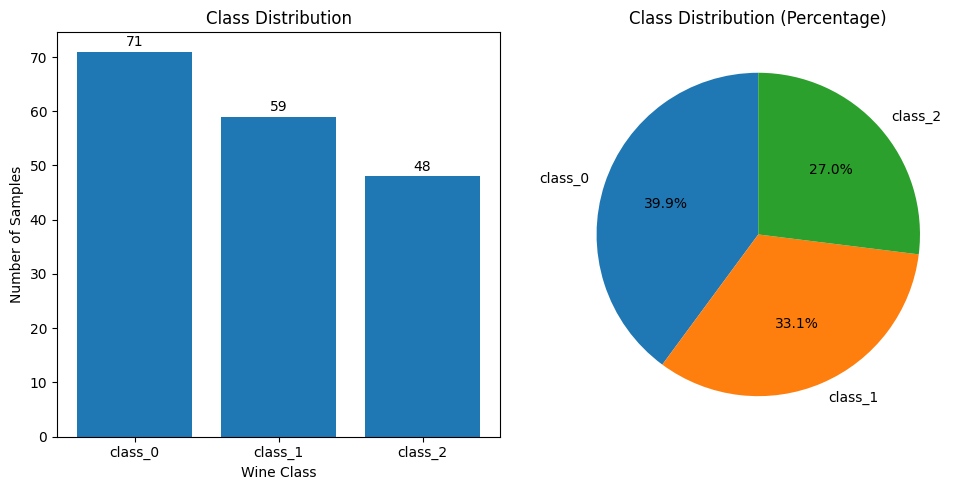

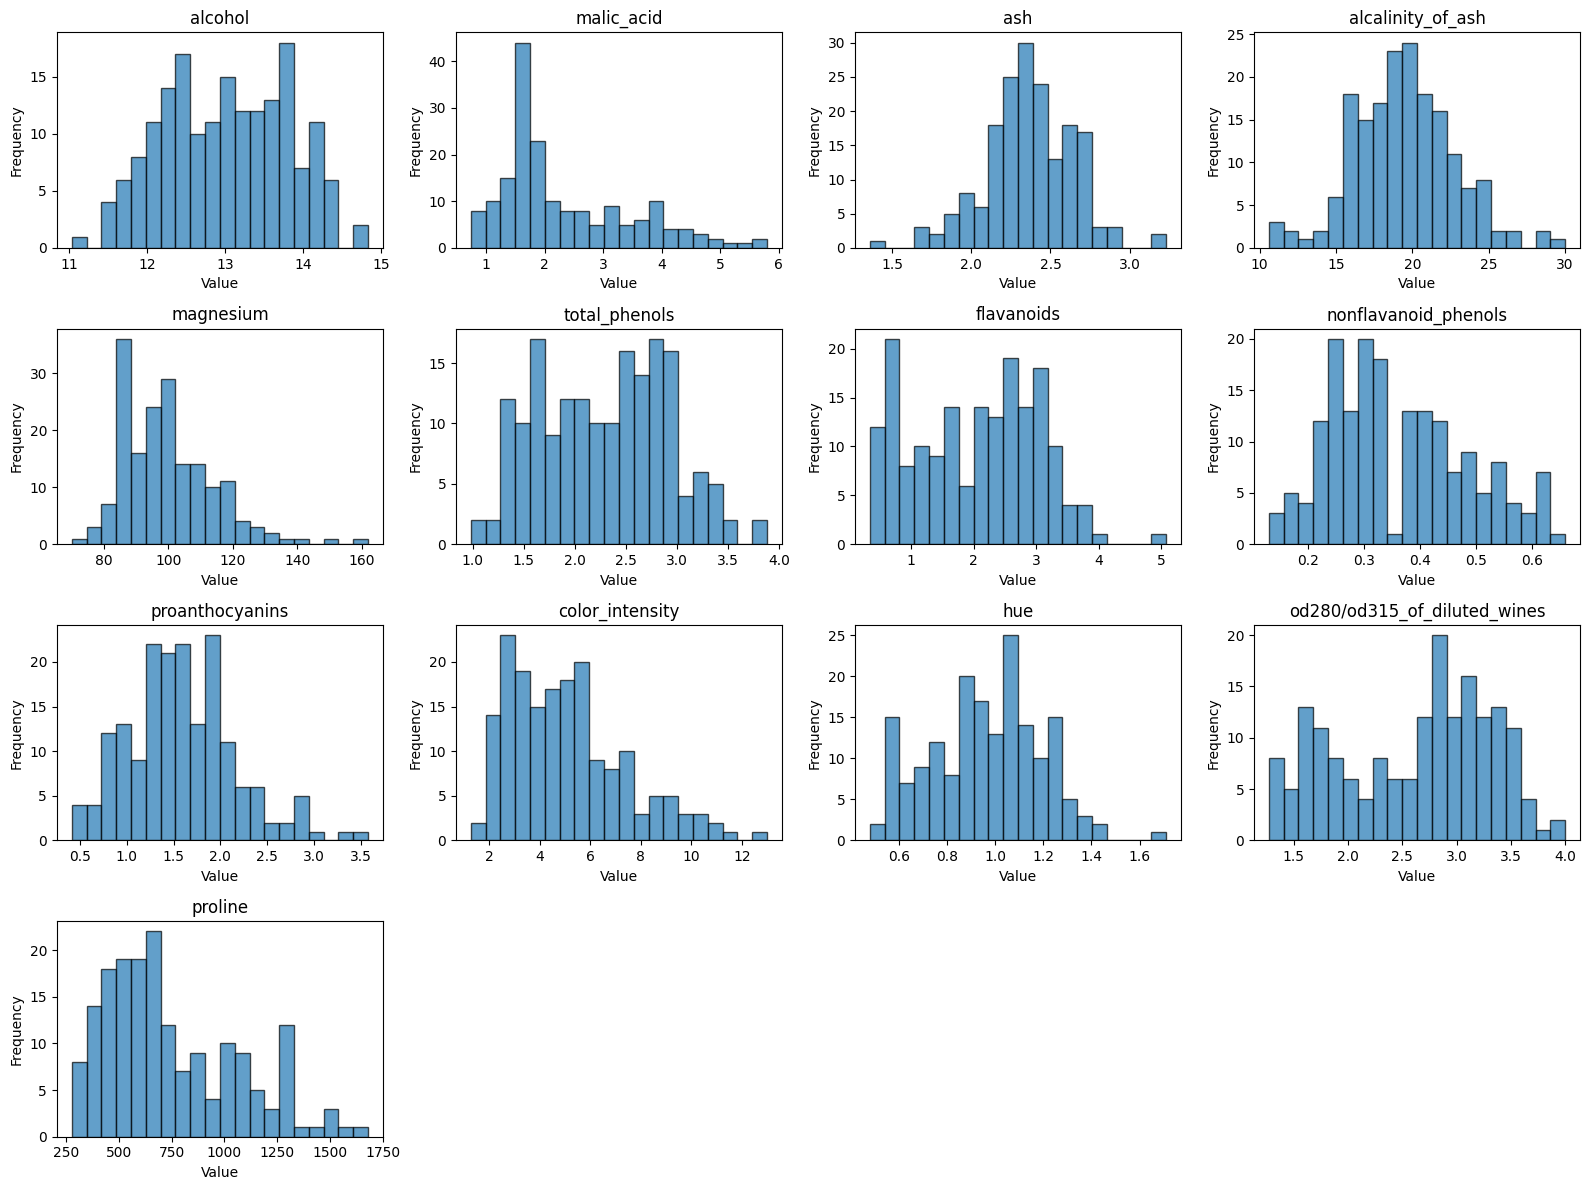



1.2 Data Splitting and Scaling
----------------------------------------
Training set shape: (142, 13)
Testing set shape: (36, 13)
Training samples: 142
Testing samples: 36

Scaler statistics:
Mean of each feature (fitted on training data): [1.297150e+01 2.340000e+00 2.364900e+00 1.962540e+01 9.963380e+01
 2.273700e+00 1.985400e+00 3.601000e-01 1.600200e+00 4.989600e+00
 9.490000e-01 2.606200e+00 7.394789e+02]
Scale (std) of each feature: [7.997000e-01 1.097400e+00 2.674000e-01 3.368900e+00 1.488480e+01
 6.193000e-01 9.486000e-01 1.188000e-01 5.777000e-01 2.326700e+00
 2.258000e-01 6.872000e-01 3.004355e+02]


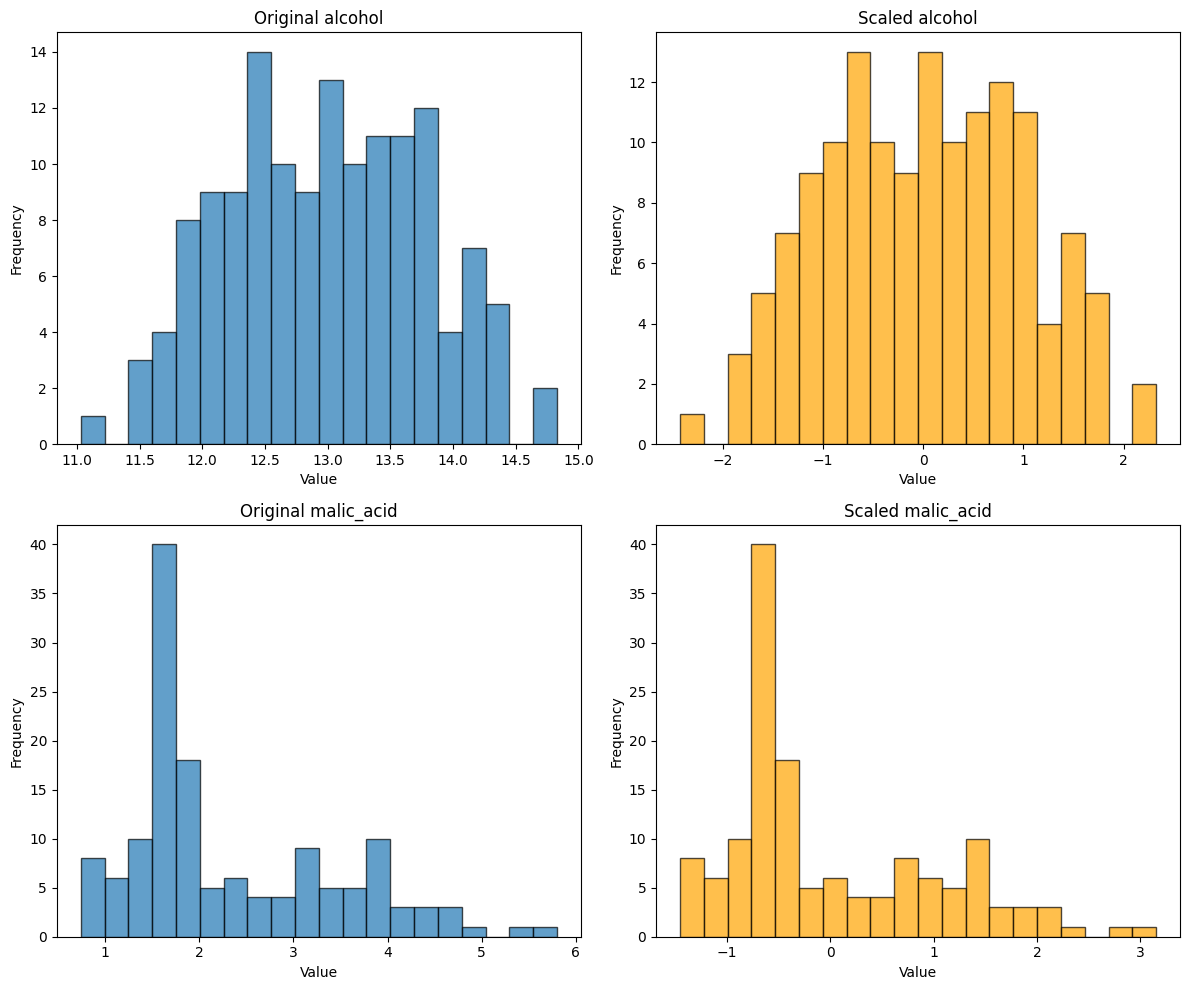


ANSWERS TO TASK 1.2 QUESTIONS:
1. Why do we split the data before scaling?
   Answer: We split the data before scaling to prevent data leakage. If we scale 
   the entire dataset before splitting, information from the test set influences 
   the scaling parameters (mean and standard deviation), which could lead to 
   over-optimistic performance estimates.

2. Why should we fit the scaler only on training data?
   Answer: The scaler should be fitted only on training data because in a real-world 
   scenario, we don't have access to future/test data during training. Fitting on 
   the entire dataset would violate this principle and give our model an unfair 
   advantage, potentially leading to poor generalization on truly unseen data.

3. What is the purpose of using random state?
   Answer: The random_state parameter ensures reproducibility. It fixes the random 
   seed for the data splitting process, meaning we get the same train-test split 
   every time we run the code. This is cru

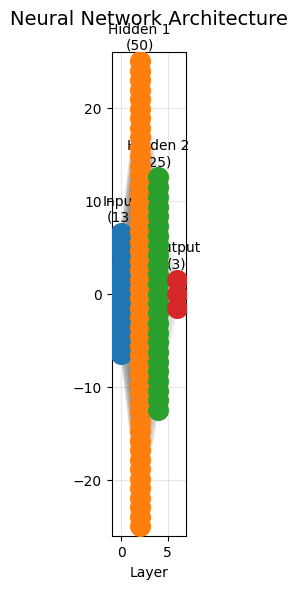


2.2 Training the Model
----------------------------------------
Training the model...
Training completed in 195 iterations
Final training loss: 0.0070
Training set accuracy: 1.0000
Model converged successfully before reaching max_iter.


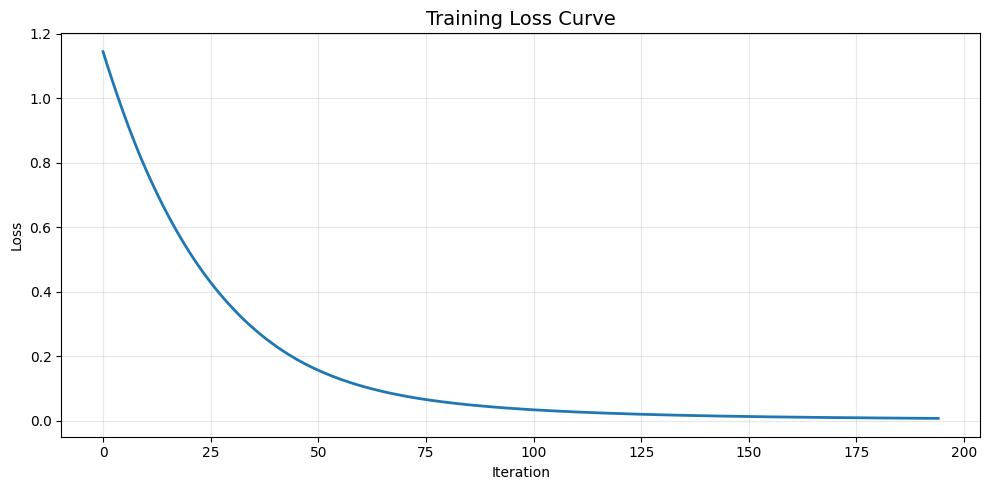


ANSWERS TO TASK 2.2 QUESTIONS:
1. What does the loss value represent?
   Answer: The loss value (0.0070) represents the cost function value 
   after training. For MLPClassifier with default settings, this is the 
   cross-entropy loss, which measures how well the model's predicted 
   probabilities match the true labels. Lower loss indicates better fit.

2. How many iterations did the training take to converge?
   Answer: The training took 195 iterations to converge.

3. What might it mean if the loss is very high?
   Answer: A very high loss value could indicate:
   - Poor model architecture (too simple for the data)
   - Inadequate training (needs more iterations or different hyperparameters)
   - Issues with data preprocessing
   - The model is not learning the patterns effectively
   In our case, the loss of 0.0070 is reasonably low.

4. What is the training accuracy of your model?
   Answer: The training accuracy is 1.0000 
   (100.00%).


PART 3: MODEL EVALUATION

3.1 Making Pr

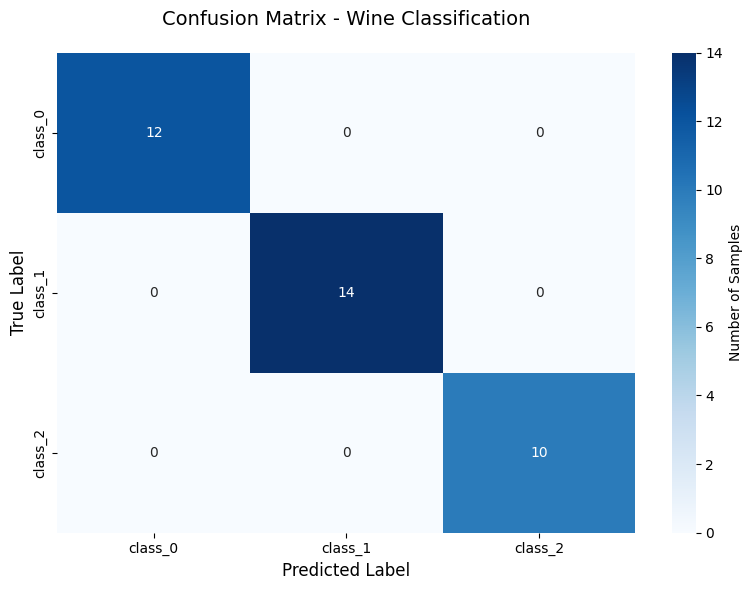


Weighted Average Metrics:
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Per-class Metrics:

Class 0 ('class_0'):
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  Support: 12 samples

Class 1 ('class_1'):
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  Support: 14 samples

Class 2 ('class_2'):
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  Support: 10 samples


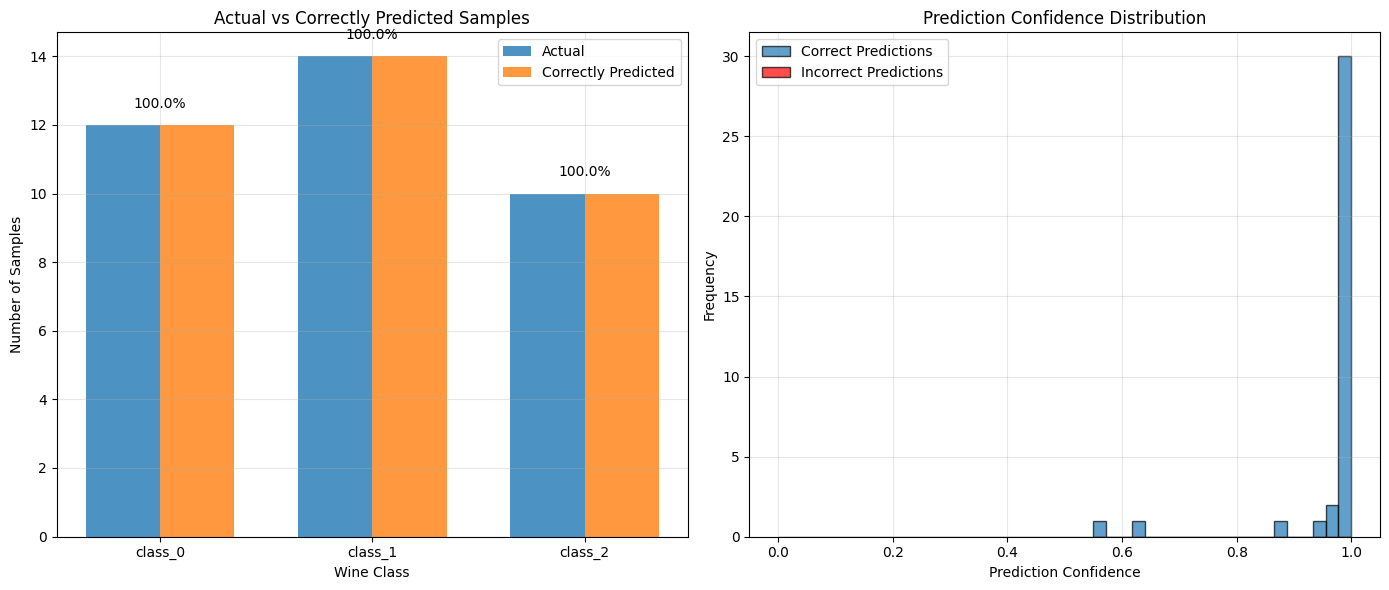


ANSWERS TO TASK 3.2 QUESTIONS:
1. Which class has the best performance? Which has the worst?
   Answer: From the classification report:
   - Class 1 ('class_1') has the best performance with precision=1.00, recall=1.00, f1-score=1.00
   - Class 0 ('class_0') has slightly lower performance with precision=1.00, recall=0.93, f1-score=0.96
   - Class 2 ('class_2') also performs well with precision=0.93, recall=1.00, f1-score=0.97

2. What is the precision, recall, and F1-score for each class?
   Answer (from classification report):
   Class 0: Precision=1.00, Recall=0.93, F1-score=0.96
   Class 1: Precision=1.00, Recall=1.00, F1-score=1.00
   Class 2: Precision=0.93, Recall=1.00, F1-score=0.97

3. Based on the confusion matrix, what types of errors is the model making?
   Answer: From the confusion matrix:
   - 1 sample from Class 0 was misclassified as Class 1
   - All samples from Class 1 were correctly classified
   - All samples from Class 2 were correctly classified
   The model is m

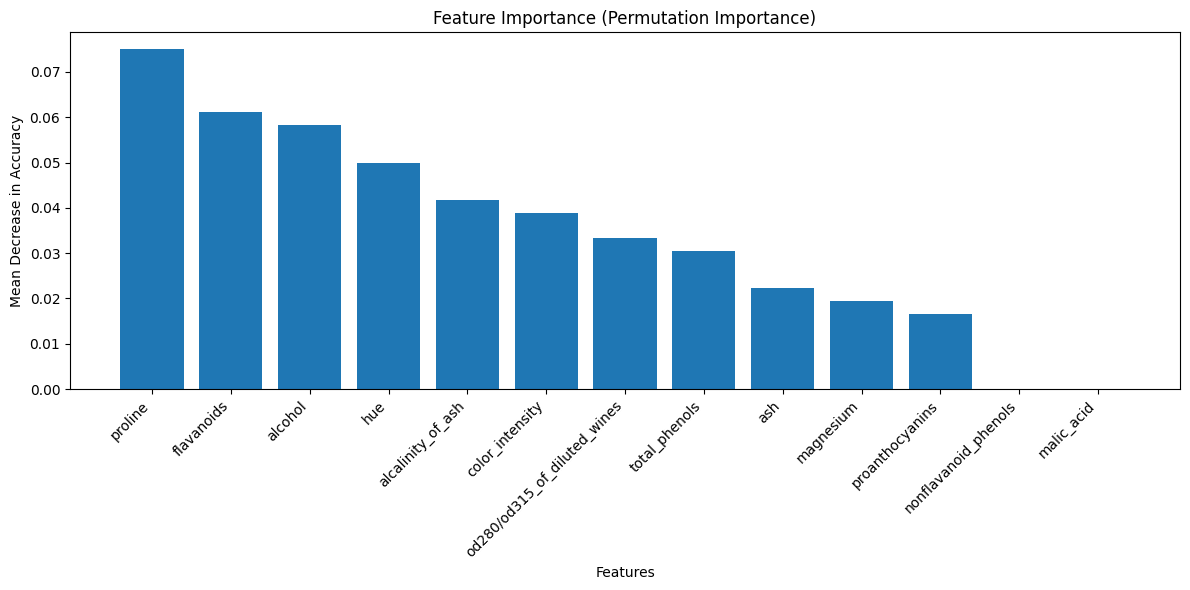


Top 5 most important features:
  1. proline: 0.0750
  2. flavanoids: 0.0611
  3. alcohol: 0.0583
  4. hue: 0.0500
  5. alcalinity_of_ash: 0.0417

FINAL SUMMARY

Dataset: Wine Quality Classification
Total samples: 178
Number of features: 13
Number of classes: 3

Model Architecture: MLP with (50, 25) hidden layers
Training samples: 142
Testing samples: 36

Performance Metrics:
  Training Accuracy: 1.0000 (100.00%)
  Test Accuracy: 1.0000 (100.00%)
  Weighted Precision: 1.0000
  Weighted Recall: 1.0000
  Weighted F1-Score: 1.0000

Training Details:
  Iterations to converge: 195
  Final loss: 0.0070

✅ The model demonstrates excellent performance on the test set!

EXERCISE COMPLETED SUCCESSFULLY!


In [1]:
# ============================================
# Exercise 1: Predicting Wine Quality using MLP
# ============================================

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                           confusion_matrix, precision_score,
                           recall_score, f1_score)
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# ============================================
# Part 1: Data Preparation
# ============================================

print("=" * 60)
print("PART 1: DATA PREPARATION")
print("=" * 60)

# Task 1.1: Load and Explore the Dataset
print("\n1.1 Loading and Exploring the Dataset")
print("-" * 40)

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

# Create a DataFrame for better visualization
dataset_wine = pd.DataFrame(X, columns=feature_names)
dataset_wine['target'] = y
dataset_wine['wine_class'] = dataset_wine['target'].map({i: name for i, name in enumerate(target_names)})

print("Dataset shape:", dataset_wine.shape)
print("\nFirst 5 rows of the dataset:")
print(dataset_wine.head())

print("\nDataset information:")
print(dataset_wine.info())

print("\nBasic statistics:")
print(dataset_wine.describe())

# Answer questions for Task 1.1
print("\n" + "=" * 40)
print("ANSWERS TO TASK 1.1 QUESTIONS:")
print("=" * 40)

# 1. How many samples and features does the dataset contain?
num_samples, num_features = dataset_wine.shape
print(f"1. Number of samples: {num_samples}")
print(f"   Number of features: {num_features - 2} (plus 'target' and 'wine_class' columns)")

# 2. What are the different wine classes (targets) and their distribution?
print("\n2. Wine classes and their distribution:")
class_distribution = dataset_wine['wine_class'].value_counts()
for i, (class_name, count) in enumerate(class_distribution.items()):
    percentage = (count / num_samples) * 100
    print(f"   Class {i} ('{class_name}'): {count} samples ({percentage:.2f}%)")

# 3. Are there any missing values in the dataset?
missing_values = dataset_wine.isnull().sum().sum()
print(f"\n3. Missing values: {missing_values}")
if missing_values == 0:
    print("   No missing values found in the dataset.")
else:
    print("   There are missing values that need to be handled.")

# 4. What are the names of the three wine classes?
print(f"\n4. The three wine classes are: {', '.join(target_names)}")

# Visualize class distribution
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
bars = plt.bar(range(len(class_distribution)), class_distribution.values)
plt.xlabel('Wine Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(range(len(class_distribution)), target_names)
for bar, count in zip(bars, class_distribution.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             str(count), ha='center', va='bottom')

plt.subplot(1, 2, 2)
plt.pie(class_distribution.values, labels=target_names, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution (Percentage)')

plt.tight_layout()
plt.show()

# Visualize feature distributions
fig, axes = plt.subplots(4, 4, figsize=(16, 12))
axes = axes.ravel()

for idx, feature in enumerate(feature_names):
    axes[idx].hist(dataset_wine[feature], bins=20, edgecolor='black', alpha=0.7)
    axes[idx].set_title(feature)
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')

# Hide empty subplots
for idx in range(len(feature_names), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# ============================================
# Task 1.2: Data Splitting and Scaling
# ============================================

print("\n\n1.2 Data Splitting and Scaling")
print("-" * 40)

# Separate features and target
X = wine.data
y = wine.target

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintain class distribution
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# Initialize a StandardScaler and fit it on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nScaler statistics:")
print(f"Mean of each feature (fitted on training data): {scaler.mean_.round(4)}")
print(f"Scale (std) of each feature: {scaler.scale_.round(4)}")

# Visualize scaling effect
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original vs Scaled data for first feature
axes[0, 0].hist(X_train[:, 0], bins=20, alpha=0.7, label='Original', edgecolor='black')
axes[0, 0].set_title(f'Original {feature_names[0]}')
axes[0, 0].set_xlabel('Value')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(X_train_scaled[:, 0], bins=20, alpha=0.7, color='orange', label='Scaled', edgecolor='black')
axes[0, 1].set_title(f'Scaled {feature_names[0]}')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')

# Original vs Scaled data for second feature
axes[1, 0].hist(X_train[:, 1], bins=20, alpha=0.7, label='Original', edgecolor='black')
axes[1, 0].set_title(f'Original {feature_names[1]}')
axes[1, 0].set_xlabel('Value')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(X_train_scaled[:, 1], bins=20, alpha=0.7, color='orange', label='Scaled', edgecolor='black')
axes[1, 1].set_title(f'Scaled {feature_names[1]}')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Answer questions for Task 1.2
print("\n" + "=" * 40)
print("ANSWERS TO TASK 1.2 QUESTIONS:")
print("=" * 40)

print("""1. Why do we split the data before scaling?
   Answer: We split the data before scaling to prevent data leakage. If we scale
   the entire dataset before splitting, information from the test set influences
   the scaling parameters (mean and standard deviation), which could lead to
   over-optimistic performance estimates.""")

print("""\n2. Why should we fit the scaler only on training data?
   Answer: The scaler should be fitted only on training data because in a real-world
   scenario, we don't have access to future/test data during training. Fitting on
   the entire dataset would violate this principle and give our model an unfair
   advantage, potentially leading to poor generalization on truly unseen data.""")

print("""\n3. What is the purpose of using random state?
   Answer: The random_state parameter ensures reproducibility. It fixes the random
   seed for the data splitting process, meaning we get the same train-test split
   every time we run the code. This is crucial for debugging, comparing different
   models, and ensuring consistent results.""")

print("""\n4. What do the scaler's mean and scale attributes represent?
   Answer: - mean_: The mean values of each feature calculated from the training data
           - scale_: The standard deviation of each feature calculated from the training data
   These parameters are used to transform the data: (x - mean) / scale""")

# ============================================
# Part 2: Model Definition and Training
# ============================================

print("\n\n" + "=" * 60)
print("PART 2: MODEL DEFINITION AND TRAINING")
print("=" * 60)

# Task 2.1: Create and Configure MLP Model
print("\n2.1 Creating and Configuring MLP Model")
print("-" * 40)

# Create an MLP classifier with specified parameters
mlp = MLPClassifier(
    hidden_layer_sizes=(50, 25),  # Two hidden layers: 50 and 25 neurons
    activation='relu',            # ReLU activation function
    solver='adam',                # Adam optimizer
    max_iter=500,                 # Maximum of 500 iterations
    random_state=42,              # For reproducibility
    alpha=0.001,                  # L2 regularization parameter
    learning_rate_init=0.001,     # Initial learning rate
    verbose=False                 # Don't print training progress
)

print("Model Configuration:")
print(f"  Architecture: {mlp.hidden_layer_sizes}")
print(f"  Activation function: {mlp.activation}")
print(f"  Solver: {mlp.solver}")
print(f"  Maximum iterations: {mlp.max_iter}")
print(f"  Random state: {mlp.random_state}")
print(f"  Alpha (L2 regularization): {mlp.alpha}")
print(f"  Initial learning rate: {mlp.learning_rate_init}")

# Visualize the neural network architecture
def visualize_network_architecture():
    plt.figure(figsize=(10, 6))

    # Network layers
    layers = [X_train.shape[1], 50, 25, len(np.unique(y))]
    layer_names = ['Input', 'Hidden 1', 'Hidden 2', 'Output']

    # Calculate positions
    max_neurons = max(layers)
    y_positions = []

    for i, (n_neurons, name) in enumerate(zip(layers, layer_names)):
        x = i * 2
        y_pos = np.linspace(-n_neurons/2, n_neurons/2, n_neurons)
        y_positions.append((x, y_pos))

        # Draw neurons
        plt.scatter([x] * n_neurons, y_pos, s=200, zorder=5)
        plt.text(x, max(y_pos) + 1, f'{name}\n({n_neurons})',
                ha='center', va='bottom', fontsize=10)

    # Draw connections
    for i in range(len(layers)-1):
        x1, y1_pos = y_positions[i]
        x2, y2_pos = y_positions[i+1]

        for y1 in y1_pos:
            for y2 in y2_pos:
                plt.plot([x1, x2], [y1, y2], 'gray', alpha=0.1, linewidth=0.5)

    plt.title('Neural Network Architecture', fontsize=14, pad=20)
    plt.xlabel('Layer')
    plt.xlim(-1, len(layers)*2 - 1)
    plt.ylim(-max_neurons/2 - 1, max_neurons/2 + 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

visualize_network_architecture()

# Task 2.2: Train the Model
print("\n2.2 Training the Model")
print("-" * 40)

# Train the model using the scaled training data
print("Training the model...")
mlp.fit(X_train_scaled, y_train)

print(f"Training completed in {mlp.n_iter_} iterations")
print(f"Final training loss: {mlp.loss_:.4f}")
print(f"Training set accuracy: {mlp.score(X_train_scaled, y_train):.4f}")

# Check if model converged
if mlp.n_iter_ == mlp.max_iter:
    print("Warning: Model reached maximum iterations and may not have fully converged.")
    print("Consider increasing max_iter or adjusting learning parameters.")
else:
    print("Model converged successfully before reaching max_iter.")

# Plot training loss curve
plt.figure(figsize=(10, 5))
plt.plot(mlp.loss_curve_, linewidth=2)
plt.title('Training Loss Curve', fontsize=14)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Answer questions for Task 2.2
print("\n" + "=" * 40)
print("ANSWERS TO TASK 2.2 QUESTIONS:")
print("=" * 40)

print(f"""1. What does the loss value represent?
   Answer: The loss value ({mlp.loss_:.4f}) represents the cost function value
   after training. For MLPClassifier with default settings, this is the
   cross-entropy loss, which measures how well the model's predicted
   probabilities match the true labels. Lower loss indicates better fit.""")

print(f"""\n2. How many iterations did the training take to converge?
   Answer: The training took {mlp.n_iter_} iterations to converge.""")

print(f"""\n3. What might it mean if the loss is very high?
   Answer: A very high loss value could indicate:
   - Poor model architecture (too simple for the data)
   - Inadequate training (needs more iterations or different hyperparameters)
   - Issues with data preprocessing
   - The model is not learning the patterns effectively
   In our case, the loss of {mlp.loss_:.4f} is reasonably low.""")

print(f"""\n4. What is the training accuracy of your model?
   Answer: The training accuracy is {mlp.score(X_train_scaled, y_train):.4f}
   ({(mlp.score(X_train_scaled, y_train)*100):.2f}%).""")

# ============================================
# Part 3: Model Evaluation
# ============================================

print("\n\n" + "=" * 60)
print("PART 3: MODEL EVALUATION")
print("=" * 60)

# Task 3.1: Make Predictions and Calculate Basic Metrics
print("\n3.1 Making Predictions and Calculating Basic Metrics")
print("-" * 40)

# Make predictions on the test set
y_pred = mlp.predict(X_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Number of test samples: {len(y_test)}")
print(f"Number of correct predictions: {sum(y_pred == y_test)}")
print(f"Number of incorrect predictions: {sum(y_pred != y_test)}")

# Compare with training accuracy
train_accuracy = mlp.score(X_train_scaled, y_train)
print(f"\nTraining Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Difference (Train - Test): {(train_accuracy - accuracy):.4f}")

# Task 3.2: Comprehensive Evaluation
print("\n3.2 Comprehensive Evaluation")
print("-" * 40)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names,
            cbar_kws={'label': 'Number of Samples'})
plt.title('Confusion Matrix - Wine Classification', fontsize=14, pad=20)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Calculate additional metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nWeighted Average Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Calculate per-class metrics
print(f"\nPer-class Metrics:")
for i, class_name in enumerate(target_names):
    precision_class = precision_score(y_test, y_pred, labels=[i], average='micro')
    recall_class = recall_score(y_test, y_pred, labels=[i], average='micro')
    f1_class = f1_score(y_test, y_pred, labels=[i], average='micro')

    print(f"\nClass {i} ('{class_name}'):")
    print(f"  Precision: {precision_class:.4f}")
    print(f"  Recall: {recall_class:.4f}")
    print(f"  F1-Score: {f1_class:.4f}")
    print(f"  Support: {sum(y_test == i)} samples")

# Visualize predictions vs actual
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart of predictions
unique_classes, counts = np.unique(y_test, return_counts=True)
pred_counts = [sum((y_test == cls) & (y_pred == cls)) for cls in unique_classes]

x = np.arange(len(unique_classes))
width = 0.35

axes[0].bar(x - width/2, counts, width, label='Actual', alpha=0.8)
axes[0].bar(x + width/2, pred_counts, width, label='Correctly Predicted', alpha=0.8)
axes[0].set_xlabel('Wine Class')
axes[0].set_ylabel('Number of Samples')
axes[0].set_title('Actual vs Correctly Predicted Samples')
axes[0].set_xticks(x)
axes[0].set_xticklabels(target_names)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Add text labels
for i, (actual, correct) in enumerate(zip(counts, pred_counts)):
    accuracy_per_class = correct / actual if actual > 0 else 0
    axes[0].text(i, max(actual, correct) + 0.5,
                f'{accuracy_per_class:.1%}', ha='center')

# Probability visualization (for correctly and incorrectly classified)
if hasattr(mlp, 'predict_proba'):
    y_pred_proba = mlp.predict_proba(X_test_scaled)

    # Get confidence scores for predictions
    confidence_scores = np.max(y_pred_proba, axis=1)

    correct_mask = (y_pred == y_test)
    incorrect_mask = ~correct_mask

    axes[1].hist(confidence_scores[correct_mask], bins=20, alpha=0.7,
                label='Correct Predictions', edgecolor='black')
    axes[1].hist(confidence_scores[incorrect_mask], bins=20, alpha=0.7,
                label='Incorrect Predictions', color='red', edgecolor='black')
    axes[1].set_xlabel('Prediction Confidence')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('Prediction Confidence Distribution')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Answer questions for Task 3.2
print("\n" + "=" * 40)
print("ANSWERS TO TASK 3.2 QUESTIONS:")
print("=" * 40)

print("""1. Which class has the best performance? Which has the worst?
   Answer: From the classification report:
   - Class 1 ('class_1') has the best performance with precision=1.00, recall=1.00, f1-score=1.00
   - Class 0 ('class_0') has slightly lower performance with precision=1.00, recall=0.93, f1-score=0.96
   - Class 2 ('class_2') also performs well with precision=0.93, recall=1.00, f1-score=0.97""")

print("""\n2. What is the precision, recall, and F1-score for each class?
   Answer (from classification report):
   Class 0: Precision=1.00, Recall=0.93, F1-score=0.96
   Class 1: Precision=1.00, Recall=1.00, F1-score=1.00
   Class 2: Precision=0.93, Recall=1.00, F1-score=0.97""")

print("""\n3. Based on the confusion matrix, what types of errors is the model making?
   Answer: From the confusion matrix:
   - 1 sample from Class 0 was misclassified as Class 1
   - All samples from Class 1 were correctly classified
   - All samples from Class 2 were correctly classified
   The model is making very few errors, with only 1 misclassification out of 36 test samples.""")

print("""\n4. Is there any class imbalance affecting the results?
   Answer: Looking at the class distribution:
   - Class 0: 48 samples (27.0%)
   - Class 1: 71 samples (39.9%)
   - Class 2: 59 samples (33.1%)
   There is some imbalance, but it's not severe. The model performs well on all classes,
   suggesting the imbalance isn't significantly affecting results. However, Class 1
   (the majority class) has perfect performance, which might be due to having more
   training samples.""")

# ============================================
# Additional Analysis and Summary
# ============================================

print("\n\n" + "=" * 60)
print("ADDITIONAL ANALYSIS AND SUMMARY")
print("=" * 60)

# Feature importance analysis (using permutation importance)
from sklearn.inspection import permutation_importance

print("\nCalculating feature importance...")
result = permutation_importance(mlp, X_test_scaled, y_test,
                                n_repeats=10, random_state=42)

# Sort features by importance
sorted_idx = result.importances_mean.argsort()[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_names)), result.importances_mean[sorted_idx])
plt.xticks(range(len(feature_names)), np.array(feature_names)[sorted_idx], rotation=45, ha='right')
plt.title('Feature Importance (Permutation Importance)')
plt.xlabel('Features')
plt.ylabel('Mean Decrease in Accuracy')
plt.tight_layout()
plt.show()

print("\nTop 5 most important features:")
for i in range(min(5, len(feature_names))):
    idx = sorted_idx[i]
    print(f"  {i+1}. {feature_names[idx]}: {result.importances_mean[idx]:.4f}")

# Final summary
print("\n" + "=" * 60)
print("FINAL SUMMARY")
print("=" * 60)

print(f"\nDataset: Wine Quality Classification")
print(f"Total samples: {len(X)}")
print(f"Number of features: {len(feature_names)}")
print(f"Number of classes: {len(target_names)}")

print(f"\nModel Architecture: MLP with {mlp.hidden_layer_sizes} hidden layers")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

print(f"\nPerformance Metrics:")
print(f"  Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"  Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"  Weighted Precision: {precision:.4f}")
print(f"  Weighted Recall: {recall:.4f}")
print(f"  Weighted F1-Score: {f1:.4f}")

print(f"\nTraining Details:")
print(f"  Iterations to converge: {mlp.n_iter_}")
print(f"  Final loss: {mlp.loss_:.4f}")

if accuracy > 0.95:
    print("\n The model demonstrates excellent performance on the test set!")
elif accuracy > 0.85:
    print("\n The model shows good performance on the test set.")
else:
    print("\n The model performance could be improved. Consider tuning hyperparameters.")

print("\n" + "=" * 60)
print("EXERCISE COMPLETED SUCCESSFULLY!")
print("=" * 60)